In [2]:
from IPython.display import Image
import ee
from pprint import pprint


In [3]:
ee.Initialize()

image = ee.Image('srtm90_v4')
pprint(image)
pprint(image.getInfo())


{'bands': [{'crs': 'EPSG:4326',
            'crs_transform': [0.000833333333333,
                              0.0,
                              -180.0,
                              0.0,
                              -0.000833333333333,
                              60.0],
            'data_type': {'max': 32767,
                          'min': -32768,
                          'precision': 'int',
                          'type': 'PixelType'},
            'dimensions': [432000, 144000],
            'id': 'elevation'}],
 'id': 'srtm90_v4',
 'properties': {'system:asset_size': 18827626666,
                'system:time_end': 951177600000,
                'system:time_start': 950227200000},
 'type': 'Image',
 'version': 1494271934303000}


In [4]:
Image(url=ee.Image('USGS/SRTMGL1_003').getThumbUrl({'min': 0, 'max': 3000}))


In [5]:
xy = ee.Geometry.Point([86.9250, 27.9881])
elev = image.sample(xy, 30).first().get('elevation').getInfo()
print('Mount Everest elevation (m):', elev)

Mount Everest elevation (m): 8794


In [6]:
import folium

In [7]:
# Define a method for displaying Earth Engine image tiles to folium map.
def add_ee_layer(self, eeImageObject, visParams, name):
  mapID = ee.Image(eeImageObject).getMapId(visParams)
  folium.raster_layers.TileLayer(
    tiles = "https://earthengine.googleapis.com/map/"+mapID['mapid']+
      "/{z}/{x}/{y}?token="+mapID['token'],
    attr = "Map Data © Google Earth Engine",
    name = name,
    overlay = True,
    control = True
  ).add_to(self)



In [8]:
# Add EE drawing method to folium.
folium.Map.add_ee_layer = add_ee_layer


In [9]:
# Set visualization parameters.
visParams = {'min':0, 'max':3000, 'palette':['225ea8','41b6c4','a1dab4','ffffcc']}


In [10]:
# Create a folium map object.
myMap = folium.Map(location=[20, 0], zoom_start=3, height=500)


In [11]:
# Add the elevation model to the map object.
myMap.add_ee_layer(image, visParams, 'DEM')



In [12]:
# Add a layer control panel to the map.
myMap.add_child(folium.LayerControl())


In [14]:
import matplotlib.pyplot as plt
# Fetch a Landsat image.
img = ee.Image('LANDSAT/LT05/C01/T1_SR/LT05_034033_20000913')


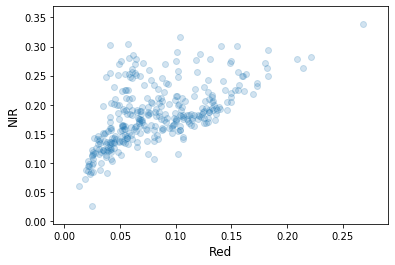

In [15]:
# Select Red and NIR bands, scale them, and sample 500 points.
sampFC = img.select(['B3','B4']).divide(10000).sample(scale=30, numPixels=500)

# Arrange the sample as a list of lists.
sampDict = sampFC.reduceColumns(ee.Reducer.toList().repeat(2), ['B3', 'B4'])
sampList = ee.List(sampDict.get('list'))

# Save server-side ee.List as a client-side Python list.
sampData = sampList.getInfo()

# Display a scatter plot of Red-NIR sample pairs using matplotlib.
plt.scatter(sampData[0], sampData[1], alpha=0.2)
plt.xlabel('Red', fontsize=12)
plt.ylabel('NIR', fontsize=12)
plt.show()
